<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Time%20Series/Time_Series_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis in Python

The datasets

Monthly US gasoline production, in millions of barrels)
Quarterly unemployment rate in the US

Each dataset will only have two columns:

date: the end date of the period (month or quarter)
value: the value of the quantity

In [1]:
#Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

#Set plot style
plt.style.use('seaborn')

#Set plot size
plt.rcParams['figure.figsize']=[8,6]



First dataset: weekly US gasoline production from `1991-02-03` to `2017-01-15`, in millions of barrels.

In [2]:
#Load data from CSV file
data = pd.read_csv('https://raw.githubusercontent.com/datacamp/time-series-analysis-in-python-live-training/master/data/US_gasoline_production.csv')

#Print DataFrame info
data.info()

#Print the DataFrame
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1355 non-null   object 
 1   value   1355 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


,date,value
0,1991-02-03,6.621
1,1991-02-10,6.433
2,1991-02-17,6.582
3,1991-02-24,7.224
4,1991-03-03,6.875
...,...,...
1350,2016-12-18,9.278
1351,2016-12-25,8.465
1352,2017-01-01,8.470
1353,2017-01-08,8.069


Creating a datetime index

The data contains dates in the date column, but the column is of type object, and it isn't the index of the DataFrame!

Solution:

Use pd.to_datetime() and .set_index() after loading the DataFrame

pd.to_datetime() accepts a value or a collection of values and converts them to a datetime object.

data.set_index() accepts the name of the column that should become the index, and retuns a new DataFrame. Specify inplace=True to avoid creating a copy.


In [3]:
# Convert the date column to datetime
data["date"] = pd.to_datetime(data["date"])

# Set the index of the DataFrame to the date column
data.set_index("date", inplace = True)

# Print DataFrame summary
data.info()

# Print DataFrame
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1355 entries, 1991-02-03 to 2017-01-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1355 non-null   float64
dtypes: float64(1)
memory usage: 21.2 KB


,value
date,
1991-02-03,6.621
1991-02-10,6.433
1991-02-17,6.582
1991-02-24,7.224
1991-03-03,6.875
...,...
2016-12-18,9.278
2016-12-25,8.465
2017-01-01,8.470


Exploratory analysis

Plotting a time series

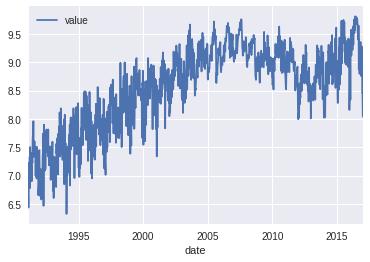

In [4]:
#Plot series
data.plot()

Changing frequency of data
Downsampling: Lower-frequency data is usually aggregated: value for week X is the sum/average/max/min/... of all the daily values in week X.


The plot looks very noisy. 

Resampling
Resampling means changing the frequency of data:

Upsampling : from lower to higher frequency (daily → hourly).

Downsampling : from higher to lower frequency (daily → weekly).

Lower-frequency data is usually aggregated: value for week X is the sum/average/max/min/... of all the daily values in week X.

Steps of downsampling:
.resample(rule='M'|'W'|'D'|..)...

aggregate .mean(), .sum()

In [5]:
# Resample the data to the average monthly values
data_monthly = data.resample("M").mean()

# Print the head of data
print(data.head())

# Print the head of resampled data
print(data_monthly.head())


            value
date             
1991-02-03  6.621
1991-02-10  6.433
1991-02-17  6.582
1991-02-24  7.224
1991-03-03  6.875
              value
date               
1991-02-28  6.71500
1991-03-31  7.08600
1991-04-30  6.97325
1991-05-31  7.19175
1991-06-30  7.61900


The resampled DataFrame contains the last day of the month for every month, and the corresponding value is the average of values within that month.

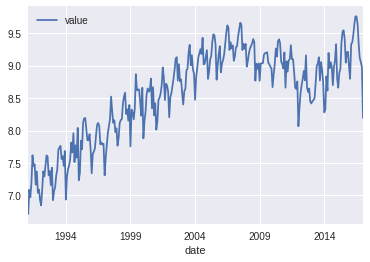

In [6]:
# Plot resampled data
data_monthly.plot()

Looks like some sort of pattern and also a trend, but both are hard to see.

Restrict the data to a time range to "zoom in" on the plot:

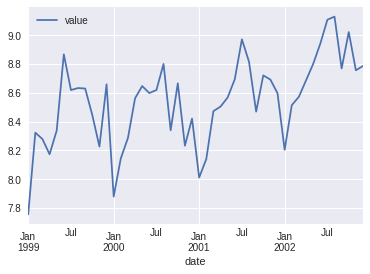

In [7]:
# Plot the data from 2000 to 2003
data_monthly["1999":"2002"].plot()

The same pattern seems to be repeated every year: January has the lowest value, July, the highest, and an additional dip in September.

Smoothing: rolling windows
Even after resampling, the trends and patterns might be hard to see.

Rolling aggregation creates a new time series: the value for each timestamp is an aggregation of a fixed number of previous values.

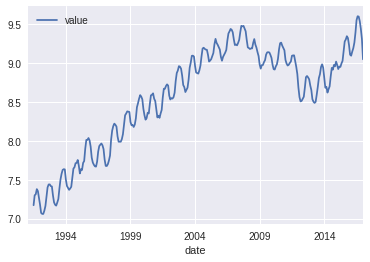

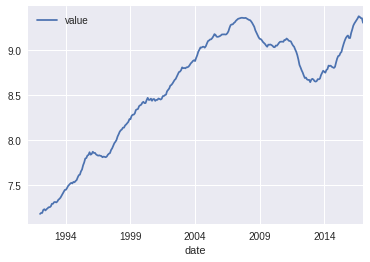

In [8]:
# Plot the resampled data with a 6 months rolling average
data_monthly.rolling(6).mean().plot()

# Plot the resampled data with a 12 months rolling average
data_monthly.rolling(12).mean().plot()

Time series = Trend + Seasonality + Residuals

Trend: general direction of the series (e.g. increasing)

Sesonality: repeating patterns in data (e.g. sales around holidays..)

Residuals: the rest

statsmodels.tsa.seasonal.seasonal_decompose() takes a DataFrame and returns an object with attributes:

.trend

.seasonal

.resid each containing the time series that encodes the corresponding part of the original series,
and a method

.plot() which makes 4 plots: original series + 3 its components

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


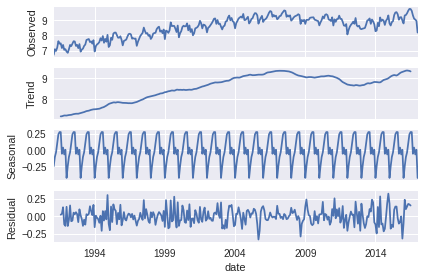

In [9]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot decomposed series
seasonal_decompose(data_monthly).plot();

# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot decomposed series
seasonal_decompose(data_monthly).plot();

Autocorrelation

For prediction, we need to know how future values of time series depend on the past values.

Correlation of two random variables is a measure of dependency of one variable on the other. For time series, autocorrelation, as the name might suggest, will measure self-correlation — the dependency of time series on itself.

Lags

Lagged time series is just the same time series shifted by a certain number of days/weeks/month, called the lag, into the past.

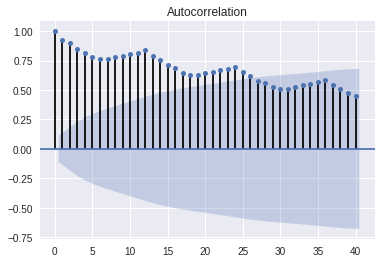

In [10]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(data_monthly, lags = 40); 

The lags are on the  𝑥  axis. Note that lag-0 correlation is always 0.

The filled band around the  𝑥  axis is the confidence interval: if the autocorrelation value is outside that range, the dependency is likely "real", but if it's inside — it's likely due to randomness.

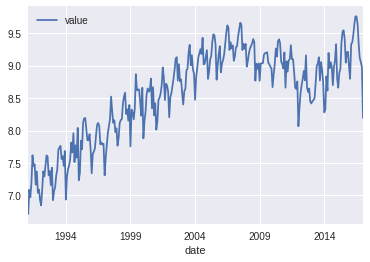

In [11]:
# Plot data_monthly again
data_monthly.plot()

The series shows a strong trend, and that's what autocorrelation plot reflects.

Autocorrelation in series with trends reflects the trend rather than intrinsic dependencies in data.

For autocorrelation analysis to be meaningful, the time series should be stationary.

Stationarity

Most time series models assume that the time series is stationary. This means, among other things:

Constant mean
Contant variance
Time series that exhibit trend and seasonality are not stationary.

Most time series models assume stationarity of the series they model, so you often need to remove trend and seasonality from the series, build the model, then put it back.

Detrending
There are a few ways to get rid of the trend.

Fit the trend curve first


In [12]:
# Difference data_monthly
data_monthly_diff = data_monthly.diff()

# Show differenced values
data_monthly_diff.head()

,value
date,
1991-02-28,NaN
1991-03-31,0.37100
1991-04-30,-0.11275
1991-05-31,0.21850
1991-06-30,0.42725


Notice the first value is NaN because there was nothing to subtract from the first value of the original series.

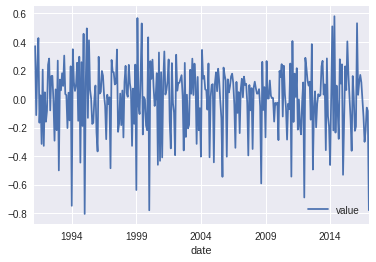

In [13]:
# Plot differenced data

data_monthly_diff.plot()

The trend disappeared! The series appears more stationary now.

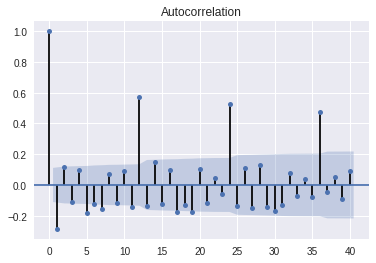

In [14]:
# Plot ACF for differenced data
plot_acf(data_monthly_diff.dropna(), lags=40);

We still see large autocorrelation at 12, 24, 36 etc lags, but this is due to seasonality: the data had a yearly pattern.

Here autocorrelation again doesn't expose anything too useful: if every January the production goes down, of course the values recorded this January will be correlated with values from last January!

Dealing with seasonality

Dealing with seasonality is much more complicated. Many organizations (e.g. US Census Bureau) have developed their own methods for removing seasonality from data.

Some things that can be done are:

Model within one period

Use seasonally-adjusted data

Do seasonal adjustment yourself

Use higher-order differencing


               value
date                
1991-02-28       NaN
1991-03-31       NaN
1991-04-30       NaN
1991-05-31       NaN
1991-06-30       NaN
1991-07-31       NaN
1991-08-31  0.022702
1991-09-30  0.034589
1991-10-31  0.128719
1991-11-30 -0.115517
               value
date                
2016-04-30  0.137950
2016-05-31  0.176393
2016-06-30  0.168386
2016-07-31  0.153326
2016-08-31       NaN
2016-09-30       NaN
2016-10-31       NaN
2016-11-30       NaN
2016-12-31       NaN
2017-01-31       NaN


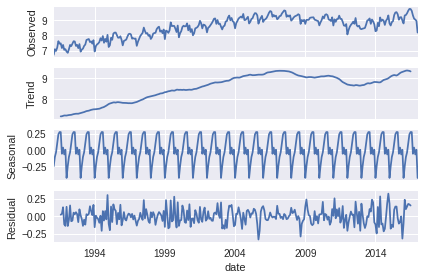

In [15]:
# Plot seasonal decomposition of data_monthly again
seasonal_decompose(data_monthly).plot()

# Extract residuals and save
data_monthly_resid = seasonal_decompose(data_monthly).resid

# Print the head and tail of the residual component
print(data_monthly_resid.head(10))
print(data_monthly_resid.tail(10))

The residual component of seasonal_decompose will have the first few and last few values missing because statmodels uses rolling average to identify trends and residuals.

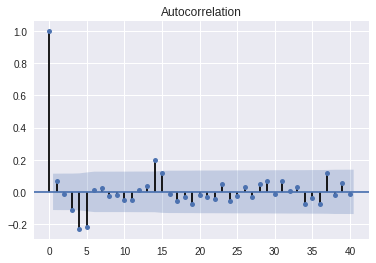

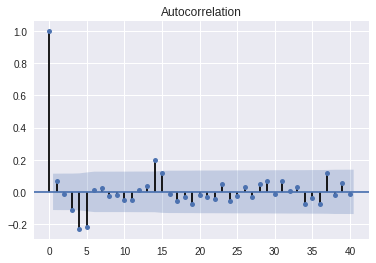

In [16]:
# Drop NaN values from residuals
data_monthly_resid = data_monthly_resid.dropna()

# Plot ACF of the residual component of data_monthly
plot_acf(data_monthly_resid, lags=40)

The seasonal patterns have been (mostly) removed. After the data is modelled, the .seasonal component can be added back to the series.

In [17]:
data_monthly_resid.shift()

,value
date,
1991-08-31,NaN
1991-09-30,0.022702
1991-10-31,0.034589
1991-11-30,0.128719
1991-12-31,-0.115517
...,...
2016-03-31,0.234947
2016-04-30,0.101877
2016-05-31,0.137950


Time series models
Random walk
Moving Average

Detecting MA model order

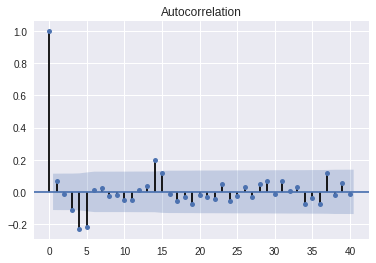

In [18]:
# Plot ACF of residuals again 
plot_acf(data_monthly_resid.dropna(), lags = 40);

Fitting MA(q) model

In [19]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit the model to data_monthly_diff
model = ARMA(data_monthly_resid, order=(0,5))
result = model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [20]:
# Print summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                  300
Model:                     ARMA(0, 5)   Log Likelihood                 262.537
Method:                       css-mle   S.D. of innovations              0.100
Date:                Fri, 06 May 2022   AIC                           -511.073
Time:                        14:17:45   BIC                           -485.147
Sample:                    08-31-1991   HQIC                          -500.698
                         - 07-31-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0003      0.000      1.284      0.200      -0.000       0.001
ma.L1.value    -0.1086      0.058     -1.859      0.064      -0.223       0.006
ma.L2.value    -0.1208      0.057     -2.109      0.036      -0.233      -0.009
ma.L3.value    -0.2123      0.050     -4.223      0.000      -0.311      -0.114
ma.L4.value    -0.3181      0.062     -5.171      0.000      -0.439      -0.198
ma.L5.value    -0.2403      0.055     -4.360      0.000      -0.348      -0.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.1754           -1.2946j            1.3065           -0.2286
MA.3            0.1754           +1.2946j            1.3065            0.2286
MA.4           -1.3371           -0.8062j            1.5614           -0.4136
MA.5           -1.3371           +0.8062j            1.5614            0.4136
-----------------------------------------------------------------------------
"""

Predicting with MA(q) model

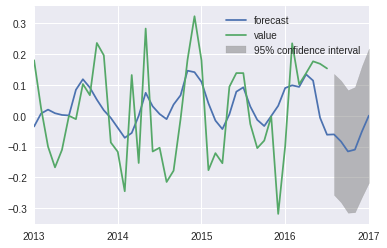

In [21]:
result.plot_predict(start="2013-01-31", end="2017-01-31");

It isn't a great forecast, but it also isn't bad, especially for such a simple model: it accurately predicts the direction of the change, but it underestimates the magnitude.


New dataset

In this section, we'll work with the US unemployment dataset from the US Census Bureau, containing quarterly data on the % of people unemployed in the US. The data has been seasonally adjusted already.

Let quickly plot it and de-trend it using differencing.

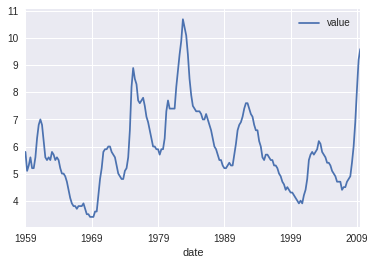

In [22]:
# Load the unemployment data and set index
unemployment = pd.read_csv("https://raw.githubusercontent.com/datacamp/time-series-analysis-in-python-live-training/master/data/US_unemployment.csv")
unemployment["date"] = pd.to_datetime(unemployment["date"])
unemployment.set_index("date", inplace=True)

# Plot the data
unemployment.plot()

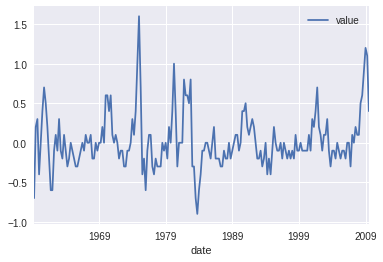

In [23]:
# Difference the data
unemployment_diff = unemployment.diff().dropna()

# Plot the differenced data
unemployment_diff.plot()

Autoregressive model

Detecting model order

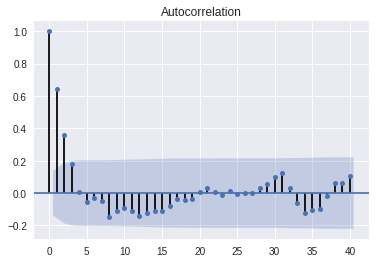

In [24]:
# Plot ACF for unemployment_diff

plot_acf(unemployment_diff, lags=40);

The value of autocorrelation oscillates between negative and positive, but the magnitude is decreasing

Partial autocorrelation function

Partial autocorrelation function is a modified autocorrelation function that takes into account dependencies between previous lags, and removes extraneous dependencies shown in the correlation function.